In [12]:
import pandas as pd
import numpy as np
from helper import cross_section_z_score, compute_metrics, compute_dfs, plot_pnl_cumsum, config_hash, compute_index_perf
import sys
sys.path.append('../')
from data.three_stocks import prices, composition, mkt_cap
from configuration.mean_reversion import three_stocks_config as c
from backtest.backtest import portfolio_pnl, portfolio_delta

In [13]:
strategy = ['MREVEW', 'MREVZS'][1]
c_hash = config_hash(universe='', strategy=strategy, **c)

In [14]:
ret, presence, historical_ret = compute_dfs(prices, composition, c['t1'], c['t2'], c['mp'])

In [15]:
if strategy == 'MREVEW':
    quantiles_top = historical_ret.quantile(q=1-c['lsr'], axis=1)
    quantiles_bottom = historical_ret.quantile(q=c['lsr'], axis=1)
    short_pos = historical_ret.ge(quantiles_top, axis=0)
    long_pos = historical_ret.le(quantiles_bottom, axis=0)
    signal_mom = long_pos * 1.0 + short_pos * (-1.0)
elif strategy == 'MREVZS':
    signal_mom = -cross_section_z_score(historical_ret)

In [16]:
pnl = portfolio_pnl(ret, presence, signal_mom)
sharpe, turnover, bias, b_size = compute_metrics(signal_mom, pnl)

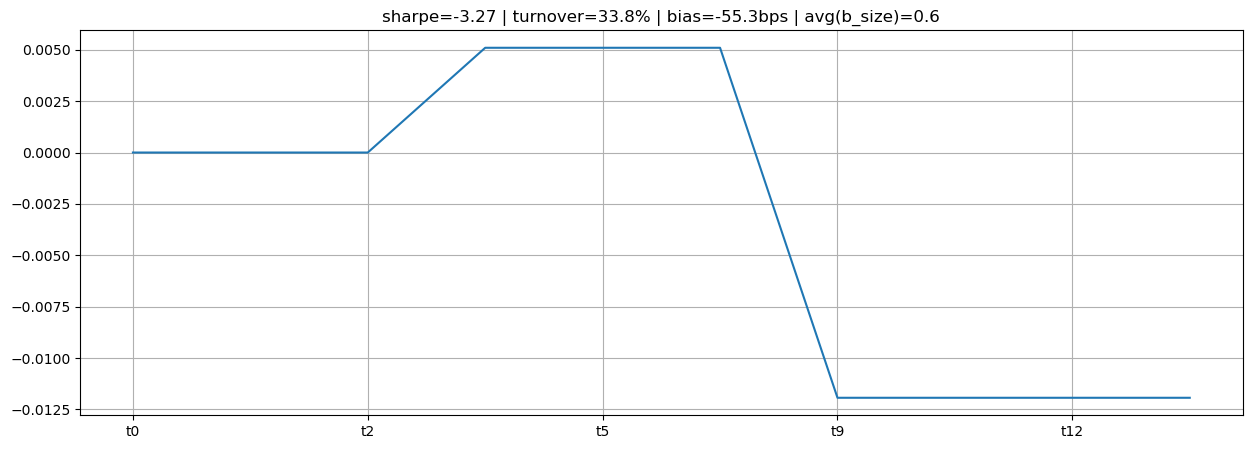

In [17]:
plot_pnl_cumsum(
    pnl=pnl,
    title=f"sharpe={sharpe:.2f} | turnover={turnover:.1f}% | bias={bias:.1f}bps | avg(b_size)={b_size.mean():.1f}",
    savedir='../figures',
    savename=c_hash,
)

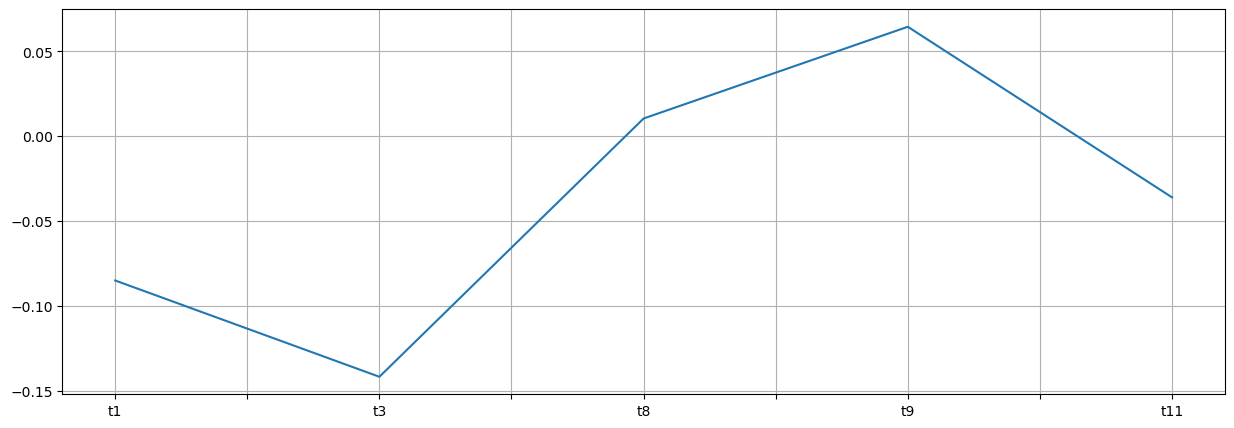

In [18]:
mkt_cap = mkt_cap.reindex_like(prices)
index_level, index_ret = compute_index_perf(mkt_cap, composition, prices)

plot_pnl_cumsum(
    pnl=index_ret,
    title=''
)

In [19]:
delta = portfolio_delta(pnl, index_ret)
print(delta)

-0.027954303086129572
